# Spam Detection TF-IDF Approach
## Do checkout Spam_Detection.ipynb for proper explanation
## In that notebook I have done proper data cleaning, analysis and analysed multiple algos for best results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('spam.csv',encoding = "ISO-8859-1")

## Data Cleaning

In [4]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Encoding Labels

In [6]:
from sklearn.preprocessing import LabelEncoder
data.rename(columns={'v1':'Spam_Ham','v2':'content'},inplace=True)
le=LabelEncoder()
data['Spam_Ham']=le.fit_transform(data['Spam_Ham'])
data.head()

,Spam_Ham,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Analysing Data

In [7]:
data.drop_duplicates(inplace=True)

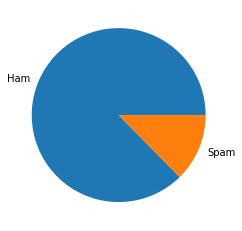

In [8]:
plt.pie(data['Spam_Ham'].value_counts(),labels=['Ham','Spam'])
plt.show()

### Counting Number of words,characters, sentences

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
data['word_count']=data['content'].apply(lambda x:len(nltk.word_tokenize(x)))
data['sentence_count']=data['content'].apply(lambda x:len(nltk.sent_tokenize(x)))
data['char_count']=data['content'].apply(len)

In [11]:
data.head()

,Spam_Ham,content,word_count,sentence_count,char_count
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


## Pre-Processing

In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#make a separate function to process data
def preProcessor(content):
    
    #lower case
    content=content.lower()
    
    #tokenize 
    content=nltk.word_tokenize(content)
    
    #Remove spl chars
    y=[]
    for i in content:
        if i.isalnum():
            y.append(i)
    
    
    content=y
    y=[]
    # remove stopwords : https://www.tutorialspoint.com/Removing-stop-words-with-NLTK-in-Python
    for i in content:
        if i not in stopwords.words('english') or i not in string.punctuation:
            y.append(i)
    
    
    #stemming reference:https://www.techtarget.com/searchenterpriseai/definition/stemming#:~:text=Stemming%20is%20the%20process%20of,natural%20language%20processing%20(NLP).
    content=y
    y=[]
    stemmer=PorterStemmer()
    for i in content:
        y.append(stemmer.stem(i))
    return " ".join(y)

In [15]:
data['Processed_Text']=data['content'].apply(preProcessor)

In [16]:
data.head()

,Spam_Ham,content,word_count,sentence_count,char_count,Processed_Text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah i do think he goe to usf he live around he...


## TF-IDF

In [21]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf=TfidfVectorizer(max_features=3000)
'''For max_features=1000 or less use MultinomialNB'''

'For max_features=1000 or less use MultinomialNB'

In [19]:
X=tfidf.fit_transform(data['Processed_Text'])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
y=data['Spam_Ham'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfor=RandomForestClassifier()
#Use MultinomialNB for max_feature=1000 or less

In [27]:
rfor.fit(X_train,y_train)


RandomForestClassifier()

In [28]:
tfidf_rfor_pred=rfor.predict(X_test)

In [29]:
from sklearn.metrics import precision_score,accuracy_score,classification_report

In [31]:
print("Accuracy of Random Forest=",accuracy_score(y_test,tfidf_rfor_pred))
print("Precision of Random Forest=",precision_score(y_test,tfidf_rfor_pred))
print(" ")
print("Classification Report".center(40,"!"))
print(classification_report(y_test,tfidf_rfor_pred))

Accuracy of Random Forest= 0.9729206963249516
Precision of Random Forest= 1.0
 
!!!!!!!!!Classification Report!!!!!!!!!!
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



## Custom Input

In [ ]:
#txt="Love you babe. I am proud of you"
txt="hllo you have won 10000 dollars cash, i am king of india"
message=[preProcessor(txt)]
vect_inp=tfidf.transform(message)
result=mnb.predict(vect_inp)